# Exploratory Data Analysis

After cleaning the data, it is important to get a deep understanding of the data, exploring any trends or patterns that exist in the data.

## Import Packages

In [1]:
# Module containing all dependencies used
import src.dependencies as dep

# Module containing custom functions
import src.functions as fn

## Load the dataset

The dataset is the transformed version obtained from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

In [2]:
# Load data
df = dep.pd.read_csv('dataset/Transformed.csv')

# Confirm successful loading
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom


## Univariate Analysis

Each variable will be investigated singularly to draw more insights from the data.

### Invoice

**Guiding Question:** _How many invoices were raised in the given time period?_

To answer this question, count all unique invoice numbers.

In [3]:
# Count invoices
invoices = len(list(df['Invoice'].value_counts())) # value_counts records each unique entry and respective count
print('There were {:,} invoices generated in the given time period'.format(invoices))

There were 44,876 invoices generated in the given time period


### Products

**Guiding Question:** _How many unique items were sold in the given time period?_

Count all the unique products using the `StockCode` as the identifier.

In [4]:
# Count products
products = len(list(df['StockCode'].value_counts()))
print('A total of {:,} unique products were sold'.format(products))

A total of 4,646 unique products were sold


**Guiding Question:** _What was the volume of sales in the time period under study?_

The sales volume refers to the total number of product units sold in the given time period.

In [5]:
# Sales volume
sales_volume = df['Quantity'].sum()
print('The volume of sales in the given time period is {:,}'.format(sales_volume))

The volume of sales in the given time period is 10,055,729


### Time Period

**Guiding Question:** _What is the time frame of the data under study?_

Get the date range from the `InvoiceDate` column.

In [6]:
# Ensure the invoice date is of date_time format
df['InvoiceDate'] = dep.pd.to_datetime(df['InvoiceDate'])

# Date range
date_from = str(df['InvoiceDate'].dt.date.min())
date_to = str(df['InvoiceDate'].dt.date.max())
print('The data ranges from {} to {}'.format(date_from, date_to))

The data ranges from 2009-12-01 to 2011-12-09


### Price

**Guiding Questions:** _How do the prices vary?_

Look at the distribution of prices.

In [7]:
# Number summary
df[['Price']].describe()

,Price
count,797885.000000
mean,3.702732
std,71.392549
min,0.000000
25%,1.250000
50%,1.950000
75%,3.750000
max,38970.000000


Over 75% of the products are priced between _0_ and _3.75_. However, there is a product that has been priced as high as _38,970_.

### Customers

**Guiding Question:** _How many customers did we serve in the given time period?_

Count the number of customers.

In [8]:
# Customers count
customers = len(list(df['Customer ID'].value_counts()))
print('A total of {:,} customers were served'.format(customers))

A total of 5,942 customers were served


### Countries

**Guiding Question:** _How many countries did we reach?_

Count the number of listed countries.

In [9]:
# Countries count
countries = len(list(df['Country'].value_counts()))
print('A total of {:,} countries were reached'.format(countries))

A total of 41 countries were reached


## Multivariate Analysis

### Sales Distribution

In order to study the pattern of sales in the sales generated between 2009 and 2011, the first step is creating a `Revenue` column which is a product of `Quantity` and `Price`.

In [10]:
# Revenue
df['Revenue'] = df['Quantity'] * df['Price']

# View sample data
df.head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0


To facilitate the analysis, get the respective invoices total.

In [11]:
# Group respective invoice data and sum the revenue
invoice_total = df.groupby(['InvoiceDate','Invoice'])['Revenue'].sum().reset_index()
invoice_total.head()

,InvoiceDate,Invoice,Revenue
0,2009-12-01 07:45:00,489434,505.30
1,2009-12-01 07:46:00,489435,145.80
2,2009-12-01 09:06:00,489436,630.33
3,2009-12-01 09:08:00,489437,310.75
4,2009-12-01 09:24:00,489438,2286.24


Investigate the monthly sales trend.

In [12]:
# Get month and year from the InvoiceDate
invoice_total['Month_Year'] = invoice_total['InvoiceDate'].dt.to_period('M')

# Aggregate monthly revenue
monthly_rev_df = invoice_total.groupby(['Month_Year']).agg({'Invoice': 'count', 'Revenue': 'sum'}).reset_index()

# Rename the columns informatively
monthly_rev_df = monthly_rev_df.rename(columns={'Invoice': 'Invoice_Count', 'Revenue': 'Monthly_Revenue'})
monthly_rev_df.head()

,Month_Year,Invoice_Count,Monthly_Revenue
0,2009-12,1901,660125.100
1,2010-01,1296,530436.512
2,2010-02,1335,487596.426
3,2010-03,1911,633419.311
4,2010-04,1617,558007.832


Visualize the results.

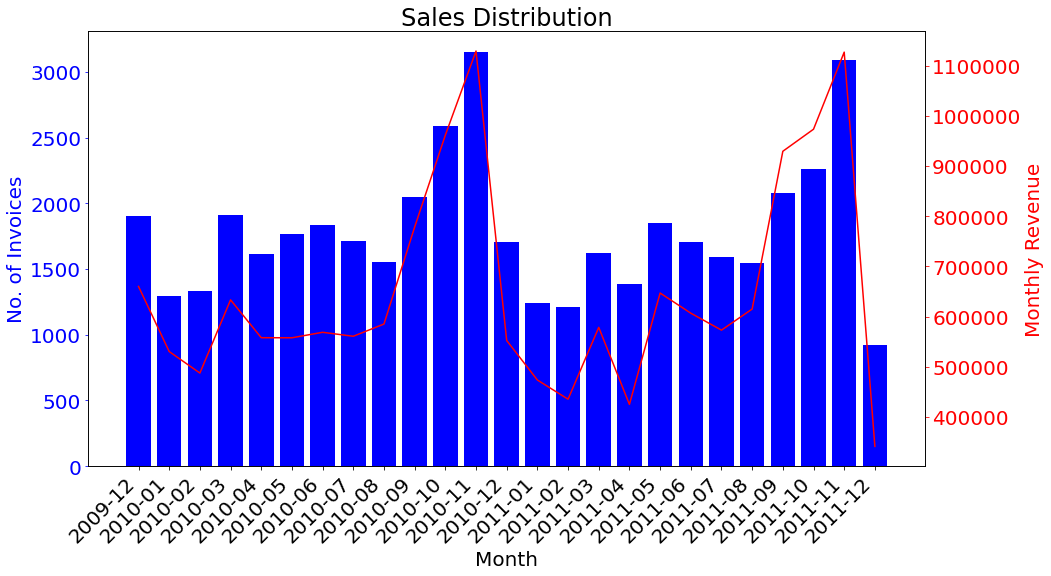

In [13]:
# Create the figure
fig, ax = dep.plt.subplots()

# Format the Month_Year column
monthly_rev_df['Month_Year'] = monthly_rev_df['Month_Year'].dt.to_timestamp('s').dt.strftime('%Y-%m')

# Figure settings
ax.set_title('Sales Distribution')
ax.set_xlabel('Month')

# Plot a bar chart - Invoice_Count
ax.bar(monthly_rev_df['Month_Year'], height=monthly_rev_df['Invoice_Count'], color = 'b')
ax.set_ylabel('No. of Invoices', color = 'b')
ax.tick_params(axis = 'y', colors = 'b')
ax.tick_params(axis = 'x', rotation = 45)
dep.plt.xticks(horizontalalignment = 'right')

# Plot a line chart - Monthly Revenue
ax2 = ax.twinx()
ax2.plot(monthly_rev_df['Month_Year'], monthly_rev_df['Monthly_Revenue'], color='r')
ax2.set_ylabel('Monthly Revenue', color = 'r')
ax2.tick_params(axis = 'y', colors = 'r')
ax2.get_yaxis().get_major_formatter().set_scientific(False)

# Save the plot
dep.plt.savefig('images/sales_distribution.png')

# Show the plot
dep.plt.show()

#### Observations:

- The number of invoices is directly proportional to the corresponding revenue. This implies that generally there is a cap in the amount spent per purchase.
- There are spikes between the months of September to November. This could be associated to the holiday season.
- Sales are generally low in January and February, with a slight spike in March.

### Basket Size

Basket size refers to the number of products a customer purchases in a single transaction. In this case, it is the total number of products per invoice.

In [14]:
# Group and count products per invoice
basket_size = df.groupby(['InvoiceDate','Invoice'])['Quantity'].sum().reset_index()

# Rename StockCode column
basket_size = basket_size.rename(columns={'Quantity': 'No_of_Prod_Units'})
basket_size.head()

,InvoiceDate,Invoice,No_of_Prod_Units
0,2009-12-01 07:45:00,489434,166
1,2009-12-01 07:46:00,489435,60
2,2009-12-01 09:06:00,489436,193
3,2009-12-01 09:08:00,489437,145
4,2009-12-01 09:24:00,489438,826


Observe the change in the monthly average basket size across time.

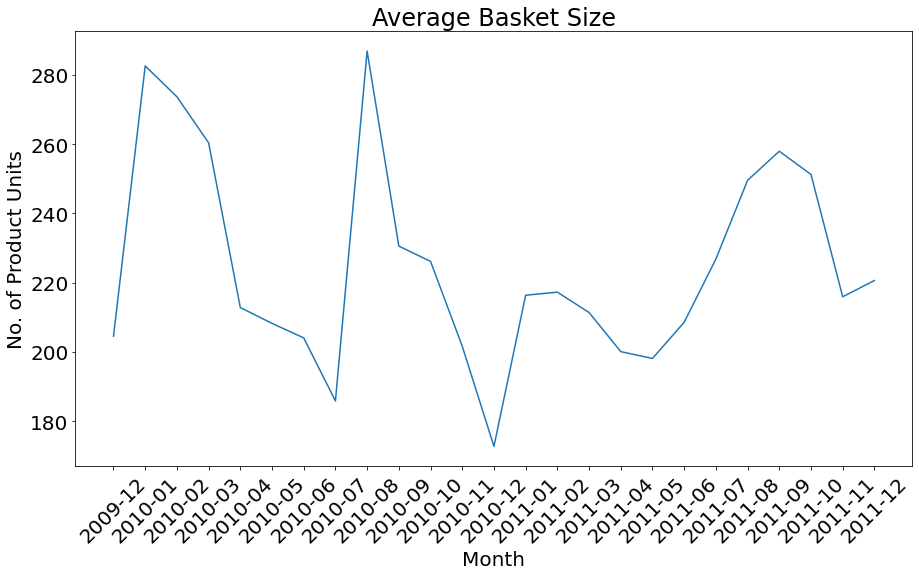

In [15]:
# Aggregate monthly data
basket_size['Month_Year'] = basket_size['InvoiceDate'].dt.to_period('M')
agg_basket_size = basket_size.groupby(['Month_Year']).agg({'Invoice': 'count', 'No_of_Prod_Units': 'sum'}).reset_index()

# Compute average
agg_basket_size['Avg_Basket_Size'] = agg_basket_size['No_of_Prod_Units'] / agg_basket_size['Invoice']

# Visualize
fig, ax = dep.plt.subplots()
agg_basket_size['Month_Year'] = agg_basket_size['Month_Year'].dt.to_timestamp('s').dt.strftime('%Y-%m')
ax.plot(agg_basket_size['Month_Year'], agg_basket_size['Avg_Basket_Size'])
ax.set_title('Average Basket Size')
ax.set_xlabel('Month')
ax.set_ylabel('No. of Product Units')
ax.tick_params(axis = 'x', rotation = 45)
dep.plt.xticks(horizontalalignment = 'right')
dep.plt.savefig('images/avg_basket_size.png')
dep.plt.show()

#### Observations:

- There isn't a disctinct pattern in the average basket size.
- On average, a basket contains between 170 and 290 product units.

### Customer Patterns

In this section, we will investigate the **average ticket size** which refers to the average amount a customer spends per purchase.

In [16]:
# Get the customer data
customer_purchase = df.groupby(['InvoiceDate','Customer ID'])['Revenue'].sum().reset_index()
customer_purchase.head()

,InvoiceDate,Customer ID,Revenue
0,2009-12-01 07:45:00,13085,505.30
1,2009-12-01 07:46:00,13085,145.80
2,2009-12-01 09:06:00,13078,630.33
3,2009-12-01 09:08:00,15362,310.75
4,2009-12-01 09:24:00,18102,2286.24


Since customers can make multiple purchases, that is have different invoices generated for them, `Customer ID` entries can appear more than once as in the resultant sample above.

Compute and visualize the average ticket size.

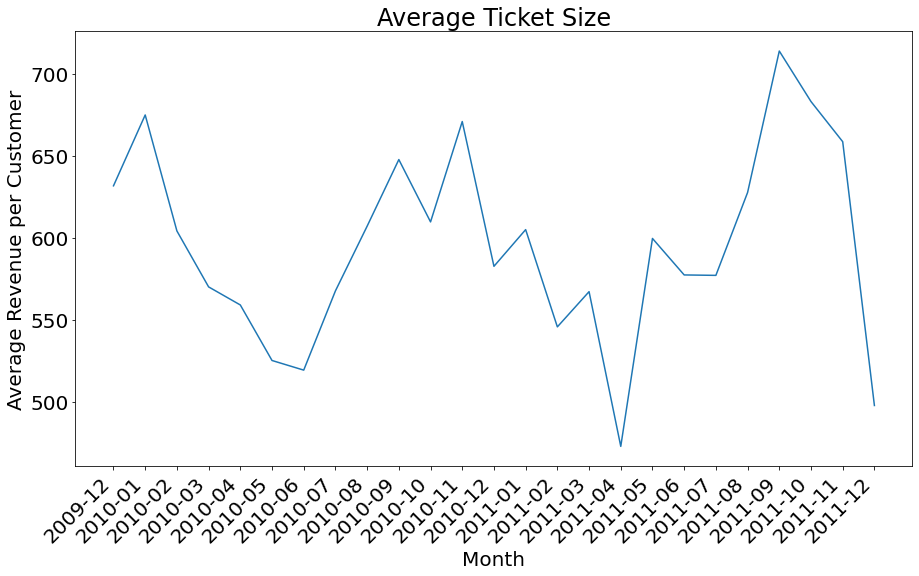

In [18]:
# Aggregate monthly data
customer_purchase['Month_Year'] = customer_purchase['InvoiceDate'].dt.to_period('M')
ticket_size = customer_purchase.groupby(['Month_Year']).agg({'Customer ID': 'nunique', 'Revenue': 'sum'}).reset_index()

# Compute average ticket size
ticket_size['Avg_Ticket_Size'] = ticket_size['Revenue']/ ticket_size['Customer ID']

# Visualize
fig, ax = dep.plt.subplots()
ticket_size['Month_Year'] = ticket_size['Month_Year'].dt.to_timestamp('s').dt.strftime('%Y-%m')
ax.plot(ticket_size['Month_Year'], ticket_size['Avg_Ticket_Size'])
ax.set_title('Average Ticket Size')
ax.set_xlabel('Month')
ax.set_ylabel('Average Revenue per Customer')
ax.tick_params(axis = 'x', rotation = 45)
dep.plt.xticks(horizontalalignment = 'right')
dep.plt.savefig('images/avg_ticket_size.png')
dep.plt.show()

#### Observations:

- Average ticket size ranges between 450 and 750.
- There isn't a distinct pattern in the average ticket size.

### Top Selling Products

We will analyze the:
- Top 10 performing products overall
- Top 5 performing products in the top 3 performing countries
- Top 5 performing products per quarter.